In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the data
dataset = pd.read_csv('./data/data_for_EHL.csv')
dataset.head()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
0,12/30/2008 0:00,EHL,246.00,250.00,228.0,250.0,245.75,232.75,478.0,9.1081,37580.0
1,12/28/2008 0:00,EHL,233.75,234.75,225.5,226.5,232.75,225.75,394.0,6.8280,29500.0
2,12/24/2008 0:00,EHL,226.00,231.00,223.0,223.0,225.75,221.50,528.0,8.9187,39260.0
3,12/23/2008 0:00,EHL,222.75,224.00,218.5,218.5,221.50,220.25,184.0,2.5838,11680.0
4,12/22/2008 0:00,EHL,221.00,226.00,215.0,226.0,220.25,223.50,381.0,5.5071,24860.0


In [3]:
dataset.tail()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
3526,2022-01-06 00:00:00,EHL,52.4,52.9,50.6,50.7,52.4,50.8,501.0,16.983,326890.0
3527,2022-01-05 00:00:00,EHL,50.8,52.0,50.0,50.3,50.8,49.7,354.0,8.756,171221.0
3528,2022-01-04 00:00:00,EHL,50.0,51.4,49.6,51.4,49.7,50.4,147.0,2.648,53190.0
3529,2022-01-03 00:00:00,EHL,50.4,52.5,48.5,48.6,50.4,48.5,481.0,13.441,266560.0
3530,2022-01-02 00:00:00,EHL,48.5,49.0,47.0,47.4,48.5,46.8,133.0,3.864,80610.0


In [7]:
dataset.dropna(subset=['closing_price'],inplace=True)

In [8]:
dataset.isnull().sum()

date                         0
trading_code                 0
last_traded_price           21
high                        21
low                         21
opening_price                8
closing_price                0
yesterdays_closing_price     0
trade                       21
value_mn                    21
volume                      21
dtype: int64

In [9]:
data = dataset.reset_index()['closing_price']

In [15]:
data

0       245.75
1       232.75
2       225.75
3       221.50
4       220.25
         ...  
3519     52.40
3520     50.80
3521     49.70
3522     50.40
3523     48.50
Name: closing_price, Length: 3524, dtype: float64

In [12]:
data.shape

(3524,)

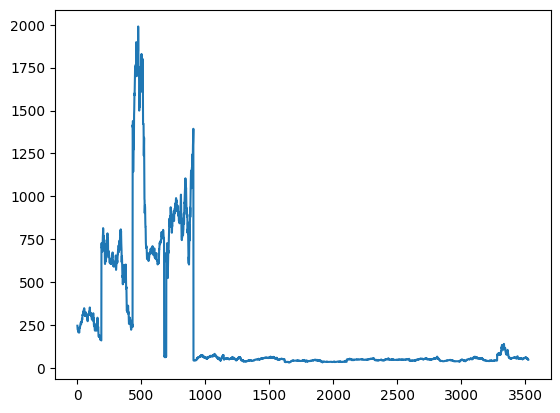

In [13]:
plt.plot(data)

In [14]:
# preprocessing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data = scaler.fit_transform(np.array(data).reshape(-1,1))

In [17]:
data.shape

(3524, 1)

In [18]:
data

array([[0.10936343],
       [0.10272451],
       [0.09914971],
       ...,
       [0.00924342],
       [0.0096009 ],
       [0.0086306 ]])

In [20]:
# train & test data splitting

train_size = int(len(data)*0.8)
test_size = len(data) - train_size

train_size, test_size

(2819, 705)

In [24]:
train_data, test_data = data[0:train_size, :], data[train_size:len(data), :]

In [26]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [27]:
time_step = 100
x_train, y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [28]:
print(x_train)

[[0.10936343 0.10272451 0.09914971 ... 0.1637515  0.15762327 0.14600516]
 [0.10272451 0.09914971 0.09697929 ... 0.15762327 0.14600516 0.14383474]
 [0.09914971 0.09697929 0.09634093 ... 0.14600516 0.14383474 0.14243036]
 ...
 [0.01133723 0.01113296 0.01143937 ... 0.01475883 0.01532058 0.01246074]
 [0.01113296 0.01143937 0.01052013 ... 0.01532058 0.01246074 0.01062227]
 [0.01143937 0.01052013 0.01062227 ... 0.01246074 0.01062227 0.01036693]]


In [29]:
print(y_train)

[0.14383474 0.14243036 0.14191967 ... 0.01062227 0.01036693 0.01021372]


In [30]:
print(x_test)

[[0.01067334 0.01164364 0.01240967 ... 0.00679213 0.00694533 0.00689426]
 [0.01164364 0.01240967 0.01077548 ... 0.00694533 0.00689426 0.00607716]
 [0.01240967 0.01077548 0.010418   ... 0.00689426 0.00607716 0.0060261 ]
 ...
 [0.01583127 0.01537165 0.01475883 ... 0.01230754 0.0097541  0.01062227]
 [0.01537165 0.01475883 0.01470776 ... 0.0097541  0.01062227 0.00980517]
 [0.01475883 0.01470776 0.01292036 ... 0.01062227 0.00980517 0.00924342]]


In [31]:
print(y_test)

[0.00607716 0.0060261  0.0060261  0.00623037 0.00607716 0.00577075
 0.00582182 0.00607716 0.00633251 0.00592396 0.00648571 0.0061793
 0.00668999 0.00587289 0.00515793 0.0053622  0.00485152 0.00454511
 0.00464724 0.00459617 0.00408549 0.00423869 0.00372801 0.00388121
 0.00372801 0.00362587 0.00362587 0.00362587 0.00362587 0.00362587
 0.00362587 0.00418763 0.00362587 0.00362587 0.00362587 0.00362587
 0.00362587 0.00362587 0.00362587 0.00362587 0.00362587 0.00362587
 0.00362587 0.00362587 0.00362587 0.00362587 0.00362587 0.00362587
 0.00362587 0.00362587 0.00362587 0.00362587 0.00362587 0.00362587
 0.00362587 0.00362587 0.00362587 0.00362587 0.00362587 0.00362587
 0.00362587 0.00362587 0.00362587 0.00367694 0.00362587 0.00377908
 0.00188954 0.0027577  0.0035748  0.00449404 0.00531114 0.00469831
 0.00388121 0.00531114 0.00592396 0.00663892 0.00679213 0.00684319
 0.00633251 0.00740495 0.00786457 0.0079667  0.0079667  0.0079667
 0.0086306  0.00898808 0.00868166 0.00868166 0.00893701 0.007813

In [32]:
print(x_train.shape), print(y_train.shape)
print(x_test.shape), print(y_test.shape)

(2718, 100)
(2718,)
(604, 100)
(604,)


(None, None)

In [33]:
# reshape input into 3D array
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [35]:
x_train.shape, x_test.shape

((2718, 100, 1), (604, 100, 1))

In [36]:
# create LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.optimizers import Adam 

In [ ]:
model = Sequential()

model.add(LSTM(units = 50,activation='relu', return_squences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation='relu', return_squences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation='relu', return_squences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.complie(optimizer = Adam(learning_rate = 0.001), loss = 'mean_squared_error')

In [ ]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
)

In [ ]:
model_history = model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 100, callbacks = [early_stopping],verbose = 0)

In [ ]:
model_history.history.keys()

In [ ]:
predict = model.predict(x_test)

In [ ]:
predict = scaler.inverse_transform(predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(y_test,predict))

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# save model
model.save("model_test.h5")

In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model('name.h5')
result = model2.predict(x_train)
result = scaler.inverse_transform(result)
print(result)